<a href="https://colab.research.google.com/github/Oluwills/Medical-Olu/blob/main/Oluwills_Truck_Capacity_Utilisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url='https://raw.githubusercontent.com/Oluwills/Shipment-Delivery/main/Hayat%20Truck%20Utilisation%20for%20July%202022.csv'
df = pd.read_csv(url)

In [ ]:
df = df.rename(columns={
    'Customer Name': 'Customer',
    'Destination City': 'Destination',
    'Total Load Volume (m3)': 'Loaded Volume',
    'Truck Volume M3': 'Load Capacity',
    'Total Transport Cost (NGN)': 'Cost'
})

df['Expenses Lost'] = df['Cost'] * (1 - df['Capacity Utilisation'])

df.head()

,Month,Customer,Destination,Loaded Volume,Truck Type,Load Capacity,Cost,Capacity Utilisation,Expenses Lost
0,JULY,X-QUISITE,RIVERS,91.07,NG Jumbo (110 m3),109.23,385000,0.83,65450.00
1,JULY,MANY AGRO ALLIED,JIGAWA,105.10,NG Jumbo (110 m3),107.94,802000,0.97,24060.00
2,JULY,FADANKAI NIGERIA LIMITED,ABUJA,73.53,NG 30 Ton (76 m3),78.86,477294,0.93,33410.58
3,JULY,KAMCHEG,RIVERS,103.36,NG Jumbo (106 m3),107.94,238000,0.96,9520.00
4,JULY,OLIVE AND OLIVE,IMO,96.99,NG Jumbo (110 m3),115.60,415510,0.84,66481.60


In [ ]:
print(df.shape)

df.isnull().sum()

(230, 8)


Month                          0
Customer \nName                0
Destination \nCity             0
Total Load Volume (m3)         0
Truck \nType                   0
Truck Volume M3                0
Total Transport Cost\n(NGN)    0
Capacity Utilisation           0
dtype: int64

<Axes: xlabel='Capacity Range'>

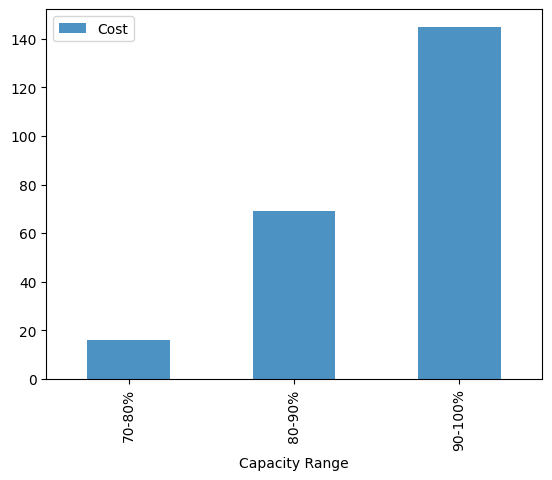

In [ ]:
df['Capacity Range'] = pd.cut(
    df['Capacity Utilisation'],
    bins=[.7, .8, .9, 1],
    labels=['70-80%', '80-90%', '90-100%']
)

df[['Capacity Range', 'Cost']].groupby('Capacity Range').count().plot.bar(alpha=.8)

In [ ]:
print(df['Expenses Lost'].min().round(2), df['Expenses Lost'].max().round(2))

3841.7 153827.5


In [ ]:
Q1 = df['Expenses Lost'].quantile(.25)
Q3 = df['Expenses Lost'].quantile(.75)
IQR = Q3 - Q1
df = df[(df['Expenses Lost'] > Q1 - 1.5 * IQR) & (df['Expenses Lost'] < Q3 + 1.5 * IQR)]

df.shape

(227, 10)

<Axes: xlabel='Capacity Utilisation', ylabel='Expenses Lost'>

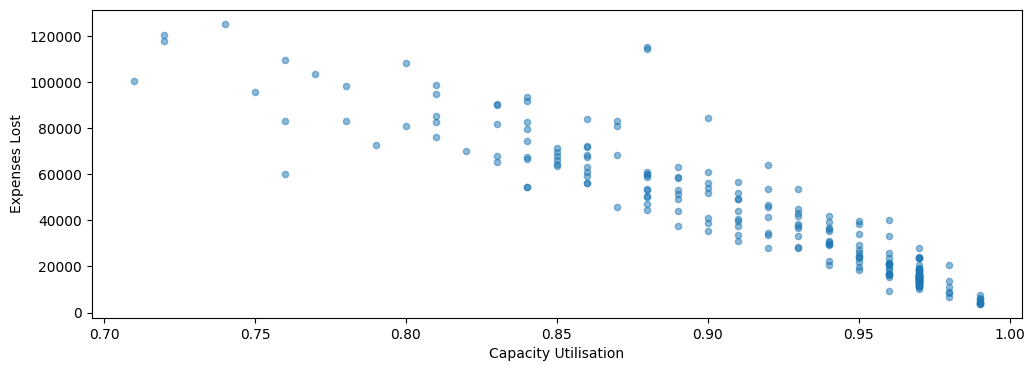

In [ ]:
df.plot(
  kind='scatter',
  x='Capacity Utilisation',
  y='Expenses Lost',
  alpha=.5,
  figsize=(12, 4)
)

<Axes: xlabel='Capacity Utilisation', ylabel='Expenses Lost'>

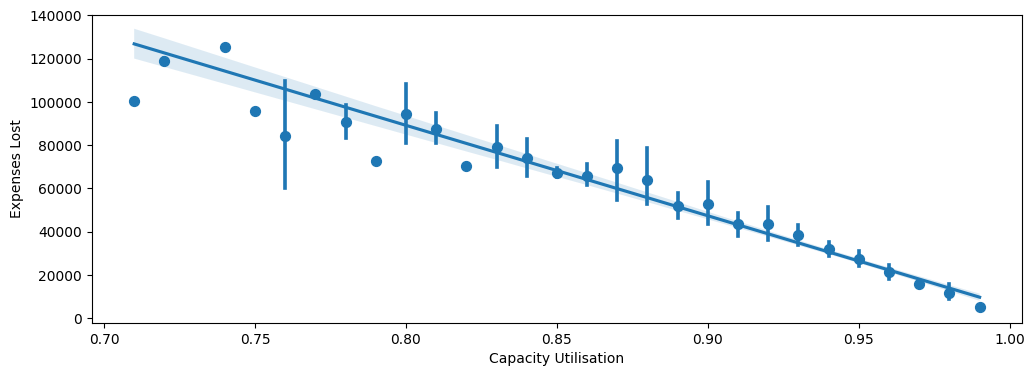

In [ ]:
plt.figure(figsize=(12, 4))
sns.regplot(
  x='Capacity Utilisation',
  y='Expenses Lost',
  data=df,
  x_estimator=np.mean
)